OK


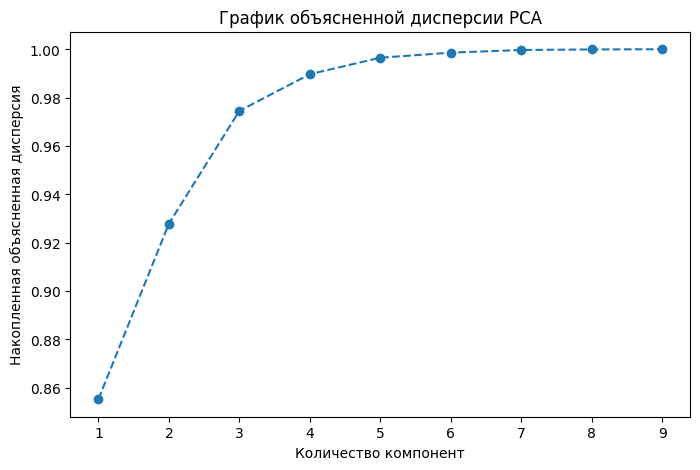

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Шаг 1: Загрузка данных
csv_file_path = "../../../data/processed/csv/eye_disease.csv"
data = pd.read_csv(csv_file_path, delimiter=";")
print("OK")

# Шаг 2: Подготовка данных
X = data.drop(columns=["ID", "is_Good"])
y = data["is_Good"]

# Шаг 3: Нормализация данных перед PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 4: Применение PCA
pca = PCA(n_components=9)  # Выбираем 9 компонент (можно изменить)
X_pca = pca.fit_transform(X_scaled)

# Визуализация объясненной дисперсии
plt.figure(figsize=(8, 5))
n_components = len(pca.explained_variance_ratio_)  # Определяем, сколько главных компонент
plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Количество компонент")
plt.ylabel("Накопленная объясненная дисперсия")
plt.title("График объясненной дисперсии PCA")
plt.show()

# Шаг 5: Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)



In [20]:
data.head()

,ID,mean_R,mean_G,mean_B,R_eye_mean_R,R_eye_mean_G,R_eye_mean_B,L_eye_mean_R,L_eye_mean_G,L_eye_mean_B,is_Good
0,image108.jpg,130.108935,107.361042,83.908445,117.555070,100.455119,81.522077,97.934394,81.138767,64.543936,0
1,image134.jpg,131.623295,93.211534,78.083036,130.287897,97.073965,83.640064,108.606854,76.289467,68.955847,0
2,image120.jpg,172.669125,111.210565,76.503535,152.226565,101.193138,70.885568,157.626559,98.629310,65.819149,0
3,image63.jpg,150.017551,130.625132,122.845369,101.005319,84.334840,78.070213,119.009243,96.952720,89.526129,0
4,image77.jpg,144.074601,106.041944,92.848261,122.380337,93.955458,86.083314,126.284867,98.963135,90.337974,0


In [21]:
y


0      0
1      0
2      0
3      0
4      0
      ..
493    1
494    1
495    1
496    1
497    1
Name: is_Good, Length: 498, dtype: int64

In [22]:
X_train

array([[ 2.00224504e+00,  9.39165891e-01, -6.52641306e-01, ...,
         1.82055355e-02, -2.25185825e-03,  4.78742525e-04],
       [ 3.04653887e+00, -8.80606440e-02,  9.15728061e-01, ...,
        -1.92683942e-02,  7.33128606e-02, -2.59019823e-03],
       [ 3.44040915e-01, -4.69433132e-01, -1.02558941e+00, ...,
        -2.62000791e-01,  2.42477187e-02, -1.72298282e-02],
       ...,
       [ 1.63965224e+00,  3.61119891e-01,  7.48397410e-01, ...,
         5.77701547e-03,  1.04386239e-02, -6.66711494e-03],
       [-8.43454257e-02, -1.35053218e+00,  8.20941819e-01, ...,
        -4.31521053e-02, -3.41989543e-02,  1.42008827e-02],
       [-7.01039639e-01, -8.01710067e-01,  3.71320806e-01, ...,
         4.04482314e-02,  4.71727974e-03, -1.98698503e-02]])

In [23]:
y_test

487    1
73     0
231    0
175    0
237    0
      ..
193    0
5      0
116    0
45     0
16     0
Name: is_Good, Length: 150, dtype: int64

In [24]:
y_train

460    1
355    1
3      0
398    1
388    1
      ..
106    0
270    0
348    1
435    1
102    0
Name: is_Good, Length: 348, dtype: int64

In [25]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 15, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.6]
}

search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy'
)

search.fit(X_train, y_train)
best_params = search.best_params_

best_params

{'n_estimators': 400,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 25}

In [26]:
# Шаг 6: Обучение модели Random Forest на PCA-преобразованных данных


rf_classifier = RandomForestClassifier(n_estimators=best_params["n_estimators"], min_samples_split=best_params["min_samples_split"], max_features=best_params["max_features"],max_depth=best_params["max_depth"], random_state=42)
rf_classifier.fit(X_train, y_train)

# Шаг 7: Прогнозирование и оценка модели
y_pred = rf_classifier.predict(X_test)
print("Точность модели:", accuracy_score(y_test, y_pred))
print("\nОтчет по классификации:\n", classification_report(y_test, y_pred))


# Шаг 8: Сохранение модели
import joblib

joblib.dump(rf_classifier, "random_forest_model.pkl")

print("Модель сохранена!")


Точность модели: 0.68

Отчет по классификации:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        92
           1       0.60      0.50      0.55        58

    accuracy                           0.68       150
   macro avg       0.66      0.65      0.65       150
weighted avg       0.67      0.68      0.67       150

Модель сохранена!


Отчет по классификации:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75        92
           1       0.60      0.53      0.56        58

    accuracy                           0.68       150
   macro avg       0.66      0.65      0.66       150
weighted avg       0.67      0.68      0.68       150

Модель сохранена!


todo: Сопоставить каждому ответу в infernce расстояние до линии отсечения классификатора. И сместить threshhold на основе расстояний.
    Удалить  ненужную парашу.